In [58]:
import pandas as pd
import chardet
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Cria o DataFrame com Pandas e encoding
dados = pd.read_csv('INMET_SE_SP_A705_BAURU_01-01-2022_A_31-12-2022.csv', encoding='cp1252', sep=';')
dados.head(50)

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,01/01/2022,0000 UTC,0,"935,8","935,8",935,NaN,"22,7","20,2","23,4","22,4","20,4","19,9",87.0,82.0,86.0,291.0,0,0
1,01/01/2022,0100 UTC,0,"936,8","936,8","935,8",NaN,"21,7","20,6","22,7","21,7","20,7",20,94.0,85.0,94.0,316.0,0,0
2,01/01/2022,0200 UTC,0,"937,4","937,4","936,8",NaN,"21,2","20,2","21,7","21,2","20,6","20,2",94.0,94.0,94.0,307.0,0,0
3,01/01/2022,0300 UTC,0,"937,3","937,4","937,3",NaN,"20,7","19,9","21,2","20,7","20,2","19,8",95.0,94.0,95.0,328.0,"2,5",0
4,01/01/2022,0400 UTC,0,"936,6","937,3","936,5",NaN,"20,2","19,7","20,7","20,2","19,9","19,7",96.0,95.0,96.0,338.0,0,0
5,01/01/2022,0500 UTC,0,936,"936,6",936,NaN,"19,8","19,2","20,2","19,8","19,6","19,2",97.0,96.0,97.0,330.0,0,0
6,01/01/2022,0600 UTC,0,"935,8","936,1","935,8",NaN,"19,4","18,8","19,8","19,4","19,2","18,8",97.0,97.0,97.0,331.0,0,0
7,01/01/2022,0700 UTC,0,"935,9",936,"935,6",NaN,"19,3","18,8","19,4","19,3","18,8","18,8",97.0,97.0,97.0,340.0,0,0
8,01/01/2022,0800 UTC,0,"936,1","936,2","935,9",NaN,"19,5",19,"19,5","19,3",19,"18,8",97.0,97.0,97.0,311.0,"2,8",0
9,01/01/2022,0900 UTC,"0,2","936,6","936,6","936,1",NaN,"19,6","19,1","19,6","19,4","19,1",19,97.0,97.0,97.0,305.0,"2,6",0


In [15]:
# Separa as colunas "Data" e TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)
data_temperatura = dados.loc[:, [ 'Data', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)']]
data_temperatura.head(50)

,Data,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"
0,01/01/2022,"22,7"
1,01/01/2022,"21,7"
2,01/01/2022,"21,2"
3,01/01/2022,"20,7"
4,01/01/2022,"20,2"
5,01/01/2022,"19,8"
6,01/01/2022,"19,4"
7,01/01/2022,"19,3"
8,01/01/2022,"19,5"
9,01/01/2022,"19,6"


In [16]:
# mostra as informações do DataFrame para saber se existem objetos nulos ou não
data_temperatura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Data                                          8760 non-null   object
 1   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  7666 non-null   object
dtypes: object(2)
memory usage: 137.0+ KB


In [37]:
# Remove os valores nulos
data_temperatura_sem_na = data_temperatura.copy()
data_temperatura_sem_na = data_temperatura_sem_na.dropna()

# mostra novamente as informações para saber se os valores nulos foram removidos
data_temperatura_sem_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7666 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Data                                          7666 non-null   object
 1   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  7666 non-null   object
dtypes: object(2)
memory usage: 179.7+ KB


In [38]:
data_temperatura_sem_na

,Data,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"
0,01/01/2022,"22,7"
1,01/01/2022,"21,7"
2,01/01/2022,"21,2"
3,01/01/2022,"20,7"
4,01/01/2022,"20,2"
...,...,...
8755,31/12/2022,"28,1"
8756,31/12/2022,"25,2"
8757,31/12/2022,"23,8"
8758,31/12/2022,"23,2"


In [56]:
# Converte a coluna 'Data' para o formato de data
data_temperatura_sem_na['Data'] = pd.to_datetime(data_temperatura_sem_na['Data'], format='%d/%m/%Y')

# Cria uma nova coluna com o mês da data
data_temperatura_sem_na['Mês'] = data_temperatura_sem_na['Data'].dt.month

# Substitue vírgulas por pontos na coluna 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'
# data_temperatura_sem_na['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'] = data_temperatura_sem_na['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].str.replace(',', '.', regex=False)

# Converte a coluna 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)' para tipo numérico (float)
data_temperatura_sem_na['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'] = data_temperatura_sem_na['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].astype(float)

# Agrupa os dados pelo mês e calcule a média da 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'
media_mensal = data_temperatura_sem_na.groupby('Mês')['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].mean().reset_index().round(1)
media_mensal

,Mês,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"
0,1,23.9
1,2,25.9
2,3,26.8
3,4,25.3
4,5,18.2
5,6,18.1
6,7,20.2
7,8,19.0
8,9,19.4
9,10,22.7


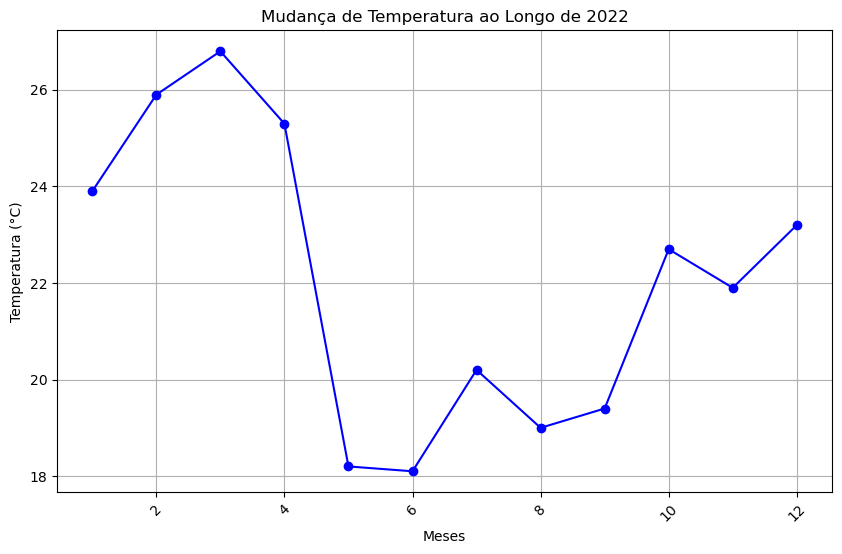

In [57]:
# Cria o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(media_mensal['Mês'], media_mensal['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'], marker='o', linestyle='-', color='blue')

# Adiciona os rótulos e título
plt.xlabel('Meses')
plt.ylabel('Temperatura (°C)')
plt.title('Mudança de Temperatura ao Longo de 2022')

# Rotaciona as datas no eixo X para melhor legibilidade
# plt.xticks(rotation=45)

# Adiciona uma grade
plt.grid(True)

# Mostra o gráfico
plt.show()